In [50]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#getting the data
data= pd.read_csv('../data/measurements.csv')

In [3]:
#seeing the data
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
#getting the second document
data_2=pd.read_excel('../data/measurements2.xlsx')

In [5]:
#it looks like both documents are the same
data_2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [6]:
data.shape, data_2.shape 

((388, 12), (388, 12))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [8]:
data_2.info() #indeed both are the same I will continue with data. The only difference is the types. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


## Cleaning the data

In [64]:
data.duplicated().any() # no duplicates I can continue

False

In [9]:
#I wills start by exploring each column 
data['distance'].value_counts()

11,8    37
16      24
12,3    23
12,4    18
15,4    14
        ..
44,9     1
36,6     1
9,9      1
16,8     1
14,7     1
Name: distance, Length: 174, dtype: int64

In [10]:
#these are floats but they have a comma instead of a fullstop. I will change that and change the type 
data['distance'] = [x.replace(',', '.') for x in data['distance']]

In [11]:
data['distance'].value_counts()

11.8    37
16      24
12.3    23
12.4    18
15.4    14
        ..
44.9     1
36.6     1
9.9      1
16.8     1
14.7     1
Name: distance, Length: 174, dtype: int64

In [12]:
data['distance']=data['distance'].astype(float)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    object 
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    object 
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     object 
 11  refill gas     13 non-null     object 
dtypes: float64(1), int64(5), object(6)
memory usage: 36.5+ KB


In [14]:
data['consume']  #same here

0        5
1      4,2
2      5,5
3      3,9
4      4,5
      ... 
383    3,7
384    4,3
385    3,8
386    4,6
387      5
Name: consume, Length: 388, dtype: object

In [15]:
data['consume'] = [x.replace(',', '.') for x in data['consume']]
data['consume']=data['consume'].astype(float)

In [16]:
data['speed'].value_counts()

42    18
43    17
38    16
26    15
36    15
33    15
40    15
32    12
44    12
37    12
29    11
39    11
55    11
46    11
45    10
58    10
25    10
24     9
50     9
35     9
57     8
41     8
52     7
53     6
48     6
28     6
30     6
21     6
61     6
51     6
47     5
56     5
22     5
34     4
49     4
27     4
62     4
59     3
60     3
54     3
75     3
23     3
31     3
80     3
69     2
16     2
18     2
71     2
20     2
82     2
63     2
14     1
73     1
66     1
85     1
67     1
88     1
65     1
90     1
87     1
Name: speed, dtype: int64

In [17]:
data['temp_inside'].value_counts()   

21,5    133
22      102
22,5     59
20       25
21       13
23       13
25       12
24,5      7
20,5      4
24        3
23,5      2
25,5      2
19        1
Name: temp_inside, dtype: int64

In [18]:
data.isnull().sum()  
#12 nulls here. As we can see above, temp_inside values range from 19 to 25,5. I will fill the nulls with the mean here

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [19]:
data['temp_inside'] = [str(x).replace(',', '.') if isinstance(x, (str, float)) else x for x in data['temp_inside']]

In [20]:
data['temp_inside'].value_counts()

21.5    133
22      102
22.5     59
20       25
21       13
23       13
nan      12
25       12
24.5      7
20.5      4
24        3
23.5      2
25.5      2
19        1
Name: temp_inside, dtype: int64

In [21]:
data['temp_inside']=data['temp_inside'].astype(float)

In [22]:
to_fill=data['temp_inside'].mean()

In [23]:
data['temp_inside']=data['temp_inside'].fillna(to_fill)

In [24]:
data['temp_inside'].isnull().sum() # correct type and no nulls now

0

In [25]:
data['temp_outside'].value_counts() #type is correct, no nulls, moving on 

 8     31
 10    31
 7     28
 6     21
 9     20
 11    20
 18    19
 12    17
 4     17
 17    16
 16    16
 15    14
 13    14
 14    13
 3     13
 5     13
 1     12
 0      9
 21     9
 2      7
 23     7
 24     7
 19     5
 27     5
 26     4
 31     3
 25     3
 20     3
 30     3
 22     3
-3      2
 28     2
-5      1
Name: temp_outside, dtype: int64

In [26]:
data['specials'].value_counts()   #I will change all this to lower case. 

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [27]:
data['specials']=data['specials'].fillna('unknown')

In [28]:
data['specials'] = [str(x).lower() if isinstance(x, (str, float)) else x for x in data['specials']]

In [29]:
data['specials'].value_counts()

unknown               295
rain                   32
sun                    27
ac                     14
ac rain                10
snow                    3
sun ac                  3
ac sun                  2
ac snow                 1
half rain half sun      1
Name: specials, dtype: int64

In [30]:
data['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [31]:
data['gas_type']=data['gas_type'].astype('category')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   distance       388 non-null    float64 
 1   consume        388 non-null    float64 
 2   speed          388 non-null    int64   
 3   temp_inside    388 non-null    float64 
 4   temp_outside   388 non-null    int64   
 5   specials       388 non-null    object  
 6   gas_type       388 non-null    category
 7   AC             388 non-null    int64   
 8   rain           388 non-null    int64   
 9   sun            388 non-null    int64   
 10  refill liters  13 non-null     object  
 11  refill gas     13 non-null     object  
dtypes: category(1), float64(3), int64(5), object(3)
memory usage: 34.0+ KB


In [33]:
data['AC'].value_counts()

0    358
1     30
Name: AC, dtype: int64

In [34]:
data['rain'].value_counts()

0    340
1     48
Name: rain, dtype: int64

In [35]:
data['sun'].value_counts()

0    356
1     32
Name: sun, dtype: int64

In [36]:
data['refill liters'].value_counts() 
# for this column I only have 13 out of 388 values so I will drop it. same for refill gas

45      2
37,7    2
39      2
37,6    1
38      1
38,3    1
10      1
41      1
37      1
37,2    1
Name: refill liters, dtype: int64

In [37]:
data.drop(['refill liters', 'refill gas'], axis=1, inplace=True)

In [38]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,unknown,E10,0,0,0
1,12.0,4.2,30,21.5,13,unknown,E10,0,0,0
2,11.2,5.5,38,21.5,15,unknown,E10,0,0,0
3,12.9,3.9,36,21.5,14,unknown,E10,0,0,0
4,18.5,4.5,46,21.5,15,unknown,E10,0,0,0
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,unknown,SP98,0,0,0
384,16.1,4.3,38,25.0,31,ac,SP98,1,0,0
385,16.0,3.8,45,25.0,19,unknown,SP98,0,0,0
386,15.4,4.6,42,25.0,31,ac,SP98,1,0,0


In [39]:
#I will now investigate the unknown category in specials since it looks like it could be just that there are no specials
data[data['specials']=='unknown']

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,unknown,E10,0,0,0
1,12.0,4.2,30,21.5,13,unknown,E10,0,0,0
2,11.2,5.5,38,21.5,15,unknown,E10,0,0,0
3,12.9,3.9,36,21.5,14,unknown,E10,0,0,0
4,18.5,4.5,46,21.5,15,unknown,E10,0,0,0
...,...,...,...,...,...,...,...,...,...,...
375,11.9,3.7,33,25.0,19,unknown,SP98,0,0,0
376,14.5,4.3,36,25.0,22,unknown,SP98,0,0,0
380,8.3,5.0,52,24.5,27,unknown,SP98,0,0,0
383,16.0,3.7,39,24.5,18,unknown,SP98,0,0,0


In [40]:
#indeed it means there are no specials. I will change it to none. 
def cleaning(x):
    if x=='unknown':
        return 'none'
    else:
        return x

In [41]:
data['specials']=data['specials'].apply(cleaning)

In [42]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,none,E10,0,0,0
1,12.0,4.2,30,21.5,13,none,E10,0,0,0
2,11.2,5.5,38,21.5,15,none,E10,0,0,0
3,12.9,3.9,36,21.5,14,none,E10,0,0,0
4,18.5,4.5,46,21.5,15,none,E10,0,0,0
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,none,SP98,0,0,0
384,16.1,4.3,38,25.0,31,ac,SP98,1,0,0
385,16.0,3.8,45,25.0,19,none,SP98,0,0,0
386,15.4,4.6,42,25.0,31,ac,SP98,1,0,0


In [47]:
data.to_csv('../data/data_clean.csv') #saving the clean data

## EDA

In [61]:
data['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

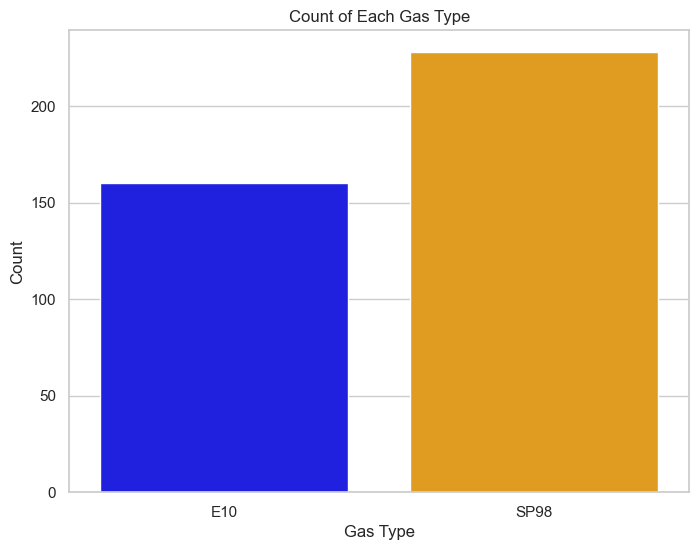

In [62]:
gas_type_counts = data['gas_type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gas_type_counts.index, y=gas_type_counts.values, palette=['blue', 'orange'])
plt.xlabel('Gas Type')
plt.ylabel('Count')
plt.title('Count of Each Gas Type')
plt.show()


As we see above there are more SP98 types than there are E10 in the data

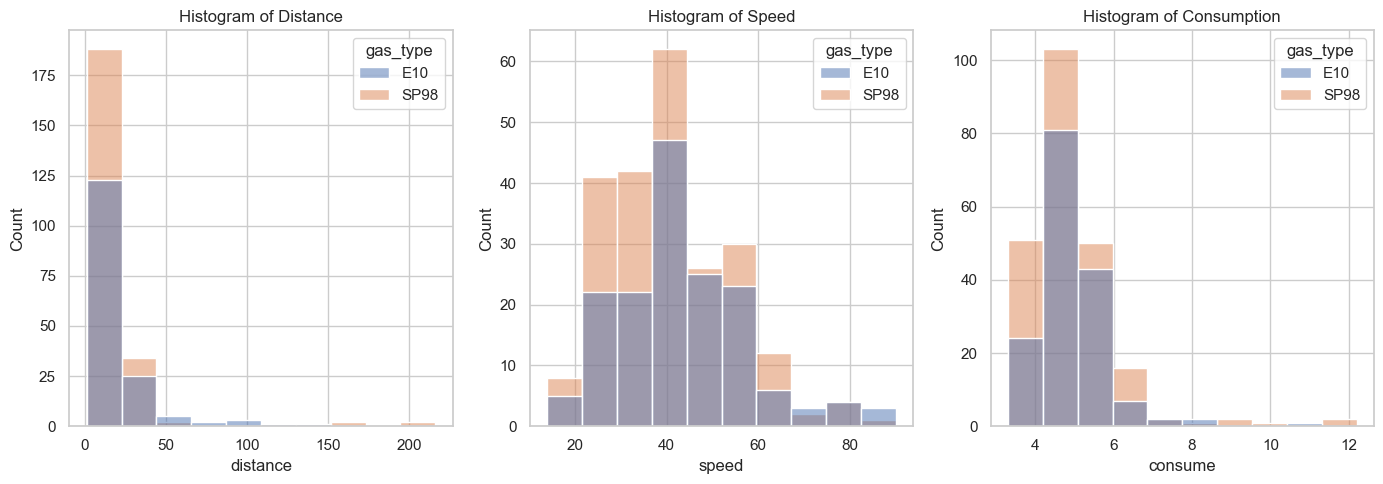

In [58]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))  # Change the figsize if needed

# Plot for 'distance'
sns.histplot(data, x='distance', hue='gas_type', kde=False, bins=10, ax=axes[0])
axes[0].set_title('Histogram of Distance')

# Plot for 'speed'
sns.histplot(data, x='speed', hue='gas_type', kde=False, bins=10, ax=axes[1])
axes[1].set_title('Histogram of Speed')

# Plot for 'consume'
sns.histplot(data, x='consume', hue='gas_type', kde=False, bins=10, ax=axes[2])
axes[2].set_title('Histogram of Consumption')

plt.tight_layout()
plt.show()

As you can see above the SP98 has higher values in all 3 histograms but that could be because there are more instances of SP98 in the data than there are of type E10. Let´s explore further

In [45]:
data[data['gas_type']=='E10'].describe().T  # details for E10 gas

,count,mean,std,min,25%,50%,75%,max
distance,160.0,21.096250,20.307234,1.7,12.075,15.4,21.20,130.3
consume,160.0,4.931250,0.900956,3.7,4.400,4.8,5.30,10.8
speed,160.0,43.506250,14.077949,14.0,35.000,42.0,51.00,88.0
temp_inside,160.0,21.917429,0.653602,21.0,21.500,21.5,22.50,25.0
temp_outside,160.0,10.118750,6.392185,-5.0,6.000,9.0,14.25,27.0
AC,160.0,0.043750,0.205181,0.0,0.000,0.0,0.00,1.0
rain,160.0,0.100000,0.300942,0.0,0.000,0.0,0.00,1.0
sun,160.0,0.075000,0.264218,0.0,0.000,0.0,0.00,1.0


In [46]:
data[data['gas_type']=='SP98'].describe().T #details for SP98 gas

,count,mean,std,min,25%,50%,75%,max
distance,228.0,18.639912,24.179598,1.3,11.8,14.15,18.150,216.1
consume,228.0,4.899123,1.118408,3.3,4.2,4.70,5.225,12.2
speed,228.0,40.820175,13.170122,16.0,32.0,39.50,48.000,90.0
temp_inside,228.0,21.938007,1.177840,19.0,21.5,22.00,22.000,25.5
temp_outside,228.0,12.228070,7.271373,-3.0,7.0,11.00,17.000,31.0
AC,228.0,0.100877,0.301829,0.0,0.0,0.00,0.000,1.0
rain,228.0,0.140351,0.348115,0.0,0.0,0.00,0.000,1.0
sun,228.0,0.087719,0.283509,0.0,0.0,0.00,0.000,1.0


Conclusions from the above:
* E10 gas runs more distance with a mean of 21.1 while SP98 has a mean of 18.6

* E10 gas consumes slightly more on average with an average of 4.93 while SP98 has an average of 4.90

* E10 gas facilitates more speed with an average of 43.5 while SP98 has an average of 40.8

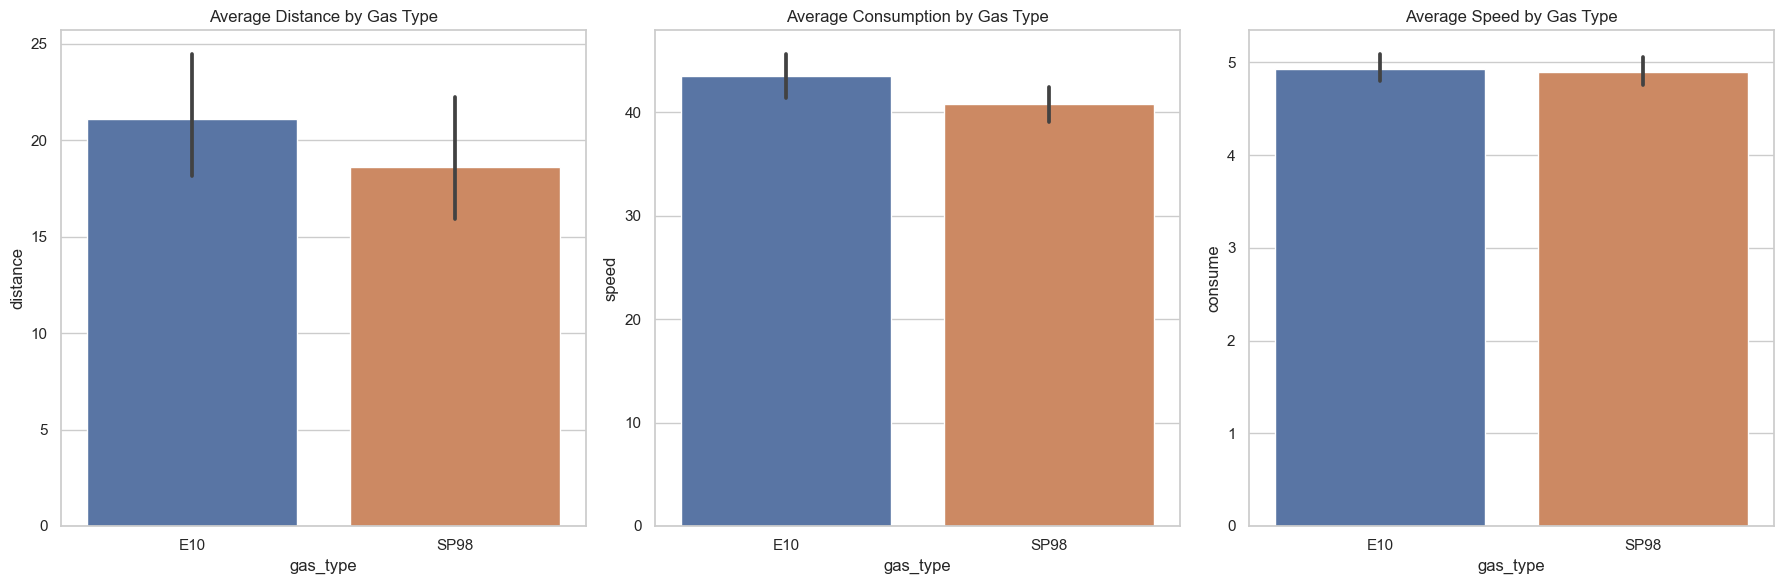

In [54]:
#let´s see the above conclusions in bar charts
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Bar chart for average 'distance' by gas type
sns.barplot(x='gas_type', y='distance', data=data, ax=axes[0])
axes[0].set_title('Average Distance by Gas Type')

# Bar chart for average 'consume' by gas type
sns.barplot(x='gas_type', y='consume', data=data, ax=axes[2])
axes[1].set_title('Average Consumption by Gas Type')

# Bar chart for average 'speed' by gas type
sns.barplot(x='gas_type', y='speed', data=data, ax=axes[1])
axes[2].set_title('Average Speed by Gas Type')


plt.tight_layout()
plt.show()